In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Задание 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [0]:
# Инициализация данных
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [0]:
# Функция стандартизации признака
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [0]:
# Копирование данных и приведение их типу данных float
X_st = X.copy().astype(np.float64)

In [0]:
# Стандартизация признаков
X_st[1] = calc_std_feat(X[1])
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])

In [0]:
# Функция градиентного спуска с L2 регуляризацией
def eval_model_reg2(X, y, lambda_, iterations, alpha=1e-4):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
  return W

In [0]:
# Формируем параметр lambda
lambda_=np.linspace(1e-4, 0.5, 300)

In [0]:
# Получаем значения весов при соответствующем параметре lambda
W_1 = []
W_2 = []
W_3 = []
for i in lambda_:
    W = eval_model_reg2(X_st, y, i, iterations=5000, alpha=1e-2)
    W_1.append(W[1])
    W_2.append(W[2])
    W_3.append(W[3])

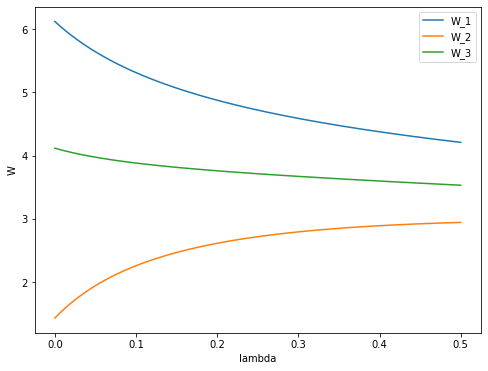

In [9]:
# Строим графики
plt.figure(figsize=(8, 6))

plt.xlabel('lambda')
plt.ylabel('W')
plt.plot(lambda_, W_1, label='W_1')
plt.plot(lambda_, W_2, label='W_2')
plt.plot(lambda_, W_3, label='W_3')
plt.legend()

### Задание 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Применить и нормализацию и стандартизацию к одному признаку можно, но я не встречал ни одного упоминания чтобы их применяли совместно.

### Задание 3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.
Для написании нам надо оставить коэффициент $\frac{lambda}{2}$ и взять частную производную модуля весов. Она будет равна $\frac{W}{|W|}$ или просто взять знак числа.

In [0]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ / 2 * np.sign(W))
  return W